In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict

import helpers as h



In [41]:
# plots style
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [42]:
PATH = 'models_selected/'

In [43]:
names = [
    'svr',
    'nusvr',
    'decision_tree',
    'random_forest',
    'adaboost',
    'gradient_boosting',
    'knn',
    'linear_regression',
    'bayesian_ridge',
    'sgd',
    'mlp',
    ]

names_o = [
    'decision_tree',
    'random_forest',
    'adaboost',
    'gradient_boosting',
    'knn',
    'linear_regression',
    'bayesian_ridge',
    ]

In [44]:
mmt = pd.read_csv('data/mmt_selected.csv')

In [48]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154 entries, 0 to 5153
Data columns (total 17 columns):
belongs_to_collection             5154 non-null int64
budget                            5154 non-null int64
popularity                        5154 non-null float64
release_date                      5154 non-null int64
revenue                           5154 non-null int64
runtime                           5154 non-null float64
words_in_title                    5154 non-null int64
words_in_original_title           5154 non-null int64
numVotes                          5154 non-null int64
averageRating                     5154 non-null float64
Action                            5154 non-null int64
Drama                             5154 non-null int64
Horror                            5154 non-null int64
Comedy                            5154 non-null int64
number_of_production_companies    5154 non-null int64
number_of_spoken_languages        5154 non-null int64
number_of_writers      

In [49]:
X = mmt.drop('averageRating', axis=1)
y = mmt['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(mmt.drop('averageRating', axis=1))
std_mmt = std_scaler.transform(mmt.drop('averageRating', axis=1))
X = std_mmt
y = mmt['averageRating']
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X, y, test_size=0.3, random_state=101)

In [51]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
mm_scaler.fit(mmt.drop('averageRating', axis=1))
mm_mmt = mm_scaler.transform(mmt.drop('averageRating', axis=1))
X = mm_mmt
y = mmt['averageRating']
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X, y, test_size=0.3, random_state=101)

In [52]:
models_std = h.open_std(path=PATH, names=names)
models_mm = h.open_mm(path=PATH, names=names)

In [53]:
models = h.open_original(path=PATH, names=names_o)

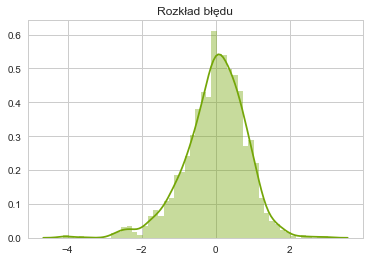

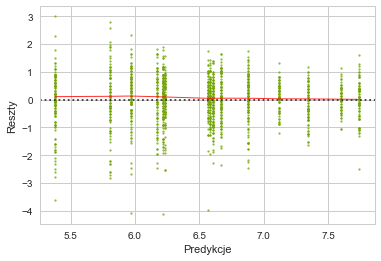

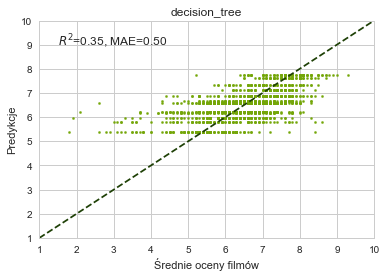

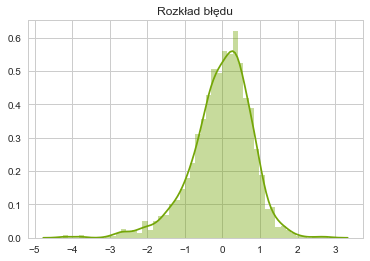

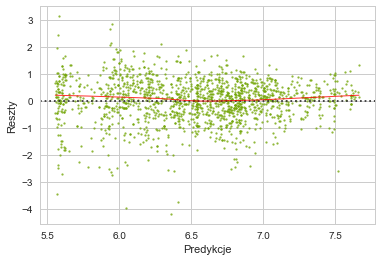

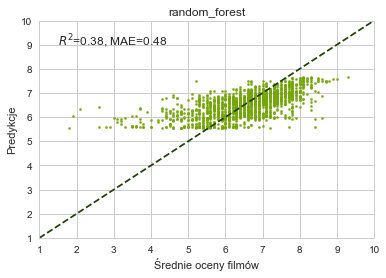

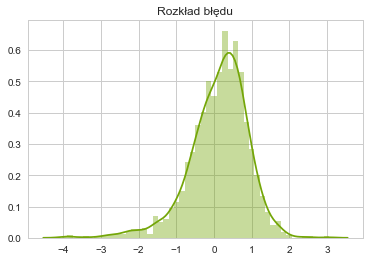

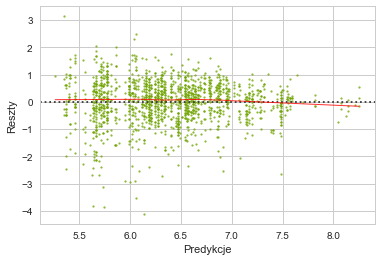

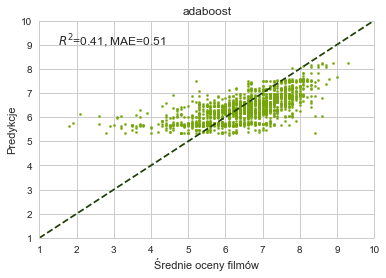

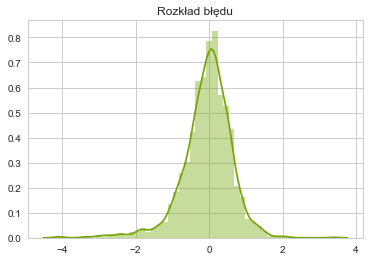

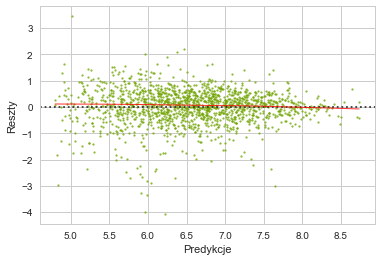

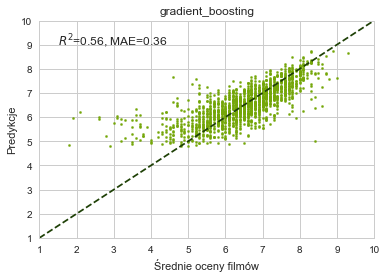

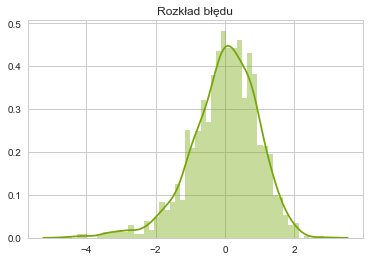

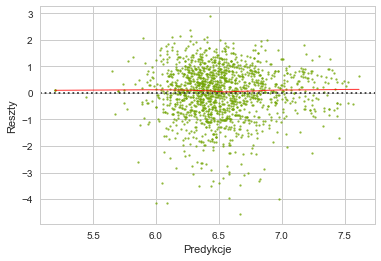

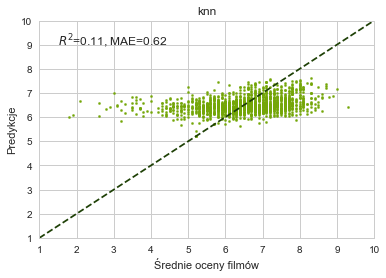

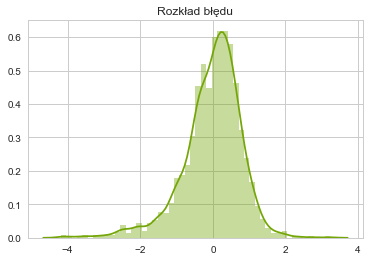

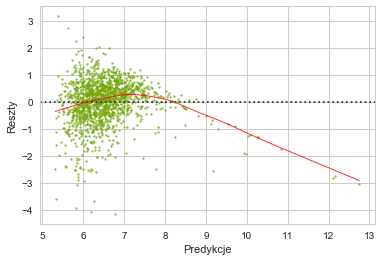

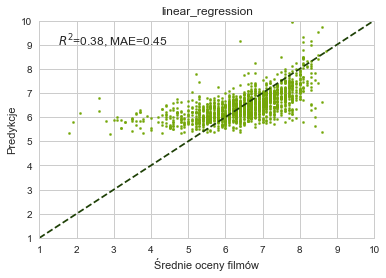

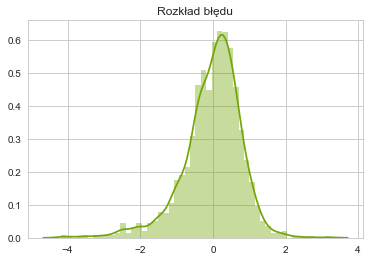

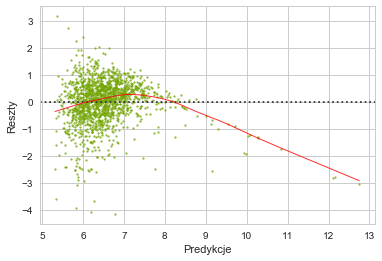

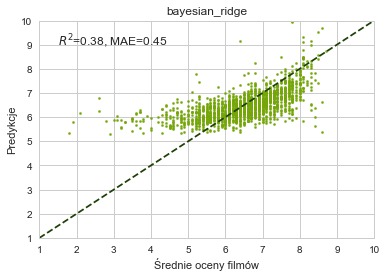

In [54]:
scores = {}

for name, model in models.items(): 
    pred = h.get_predictions(model, X_test)
    h.plot(y_test, pred, 'selected_features/original', name)
    scores[name] = h.scores(pred, y_test)

In [55]:
for name in scores.keys():
    print(name+ ": " + str(scores[name]['accuracy']))

decision_tree: 90.10303998019137
random_forest: 90.50254075107021
adaboost: 90.21577382378133
gradient_boosting: 92.30216792023455
knn: 88.59017040984726
linear_regression: 90.73955617910111
bayesian_ridge: 90.73934138185481


In [56]:
acc = {}
mae = {}
mse = {}
rmse = {}
r2 = {}
for name, value in scores.items():
    acc[name] = value['accuracy']
    mae[name] = value['mae']
    mse[name] = value['mse']
    rmse[name] = value['rmse']
    r2[name] = value['r2']


In [57]:
x_bar = acc.keys()
y_bar = acc.values()
y_bar = [round(i, 2) for i in y_bar]

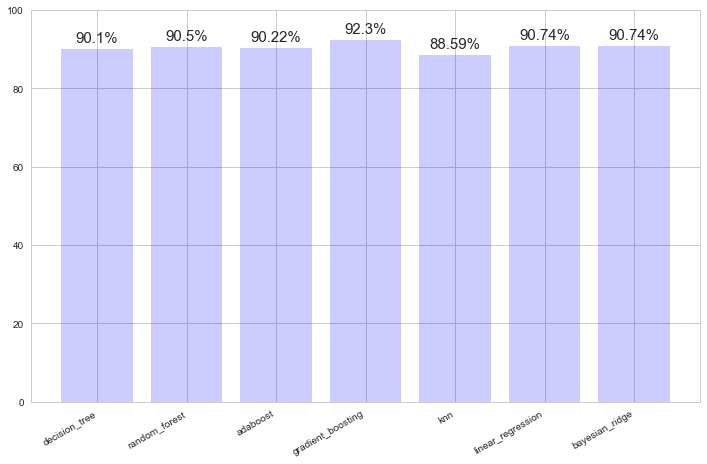

In [58]:
from matplotlib import cm
f, ax = plt.subplots(1,1, figsize=(12,8))
f.autofmt_xdate()
ax.set_ylim(0,100)
g = plt.bar(x_bar, y_bar, alpha=0.2, color=cm.bwr_r(y_bar))
h.autolabel(ax, g, 0, 15)   
plt.savefig('images/selected_features/models_accuracy.jpg', dpi = 300)

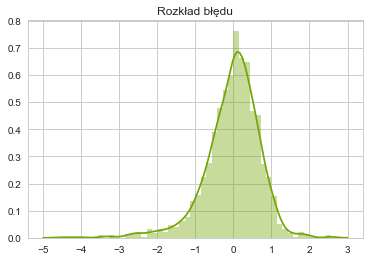

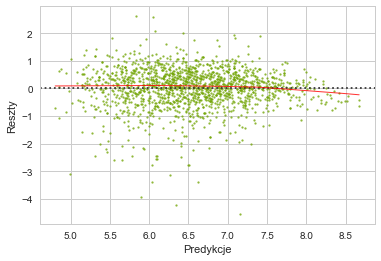

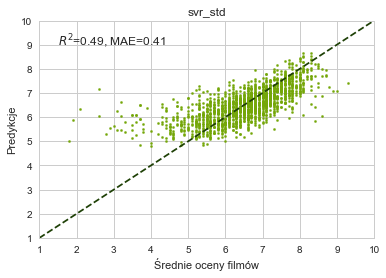

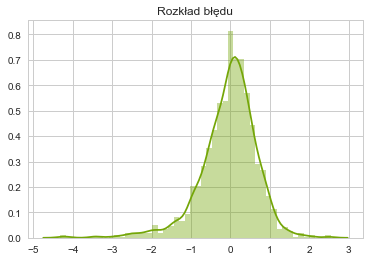

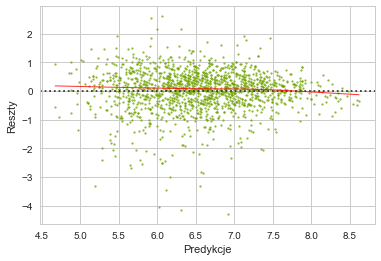

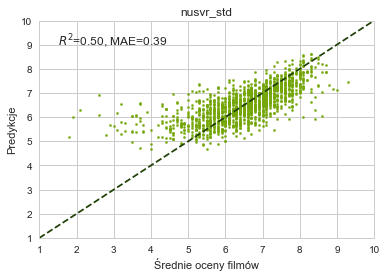

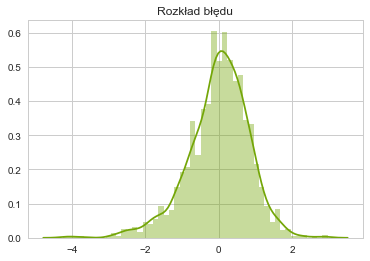

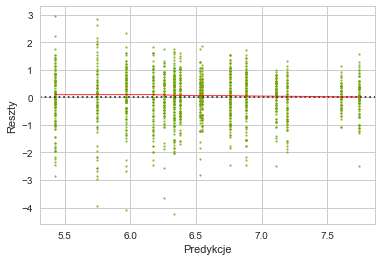

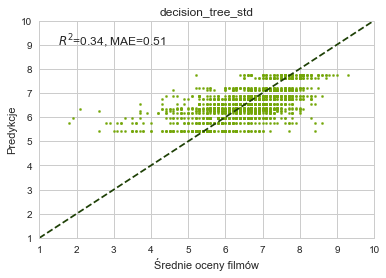

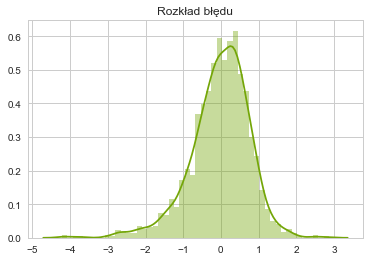

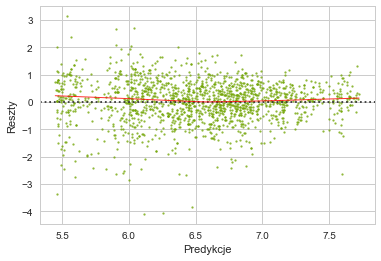

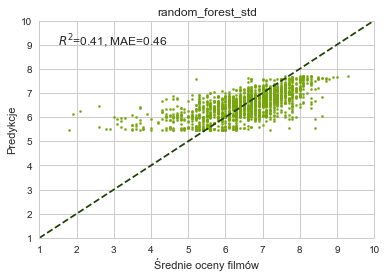

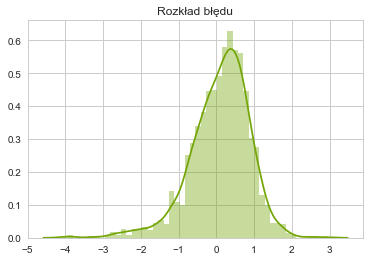

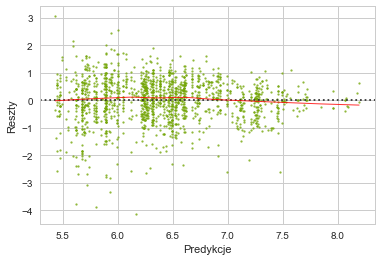

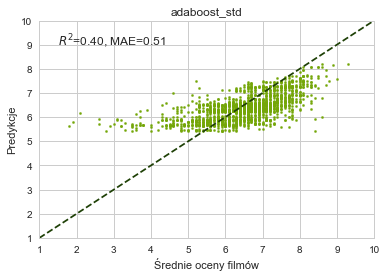

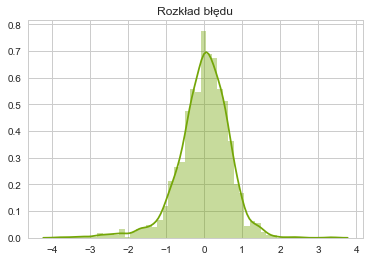

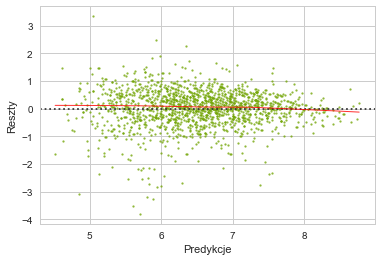

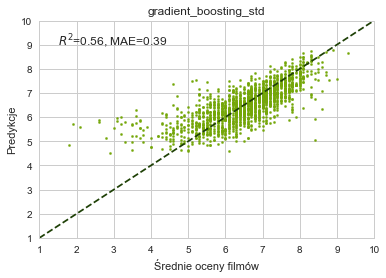

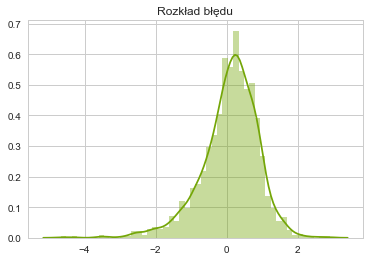

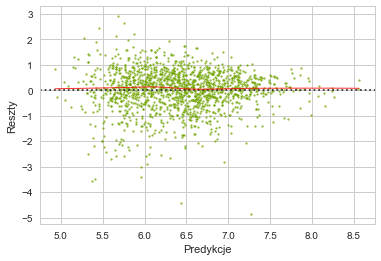

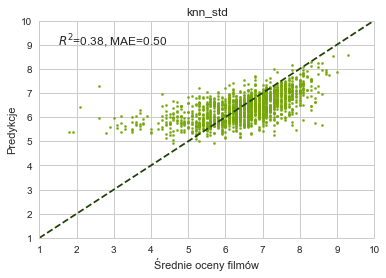

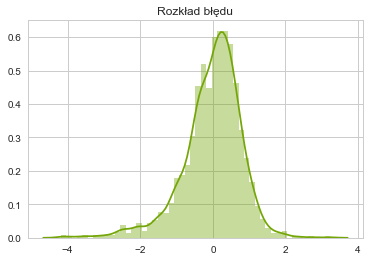

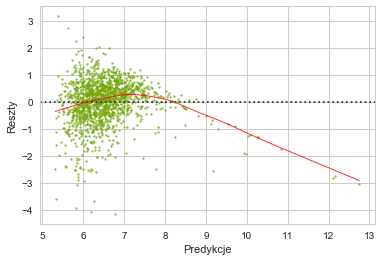

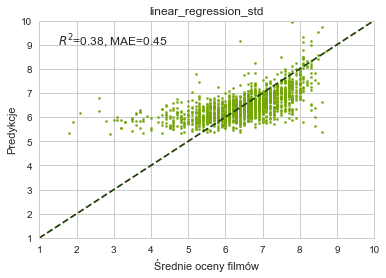

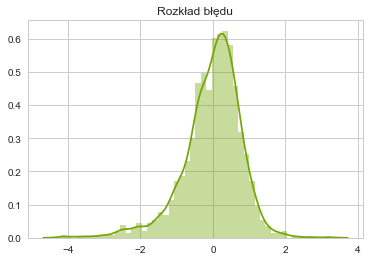

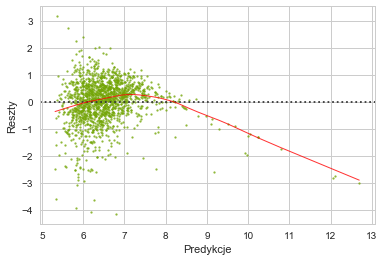

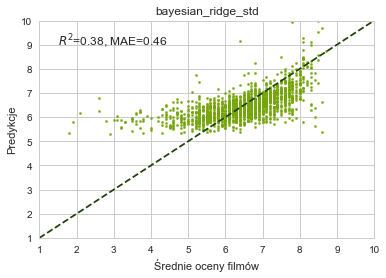

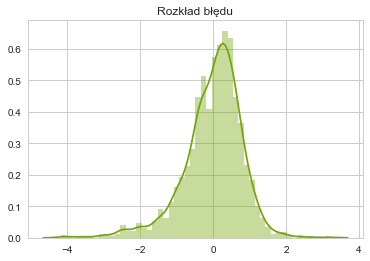

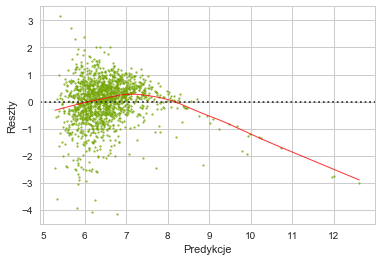

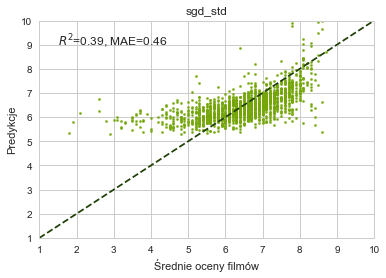

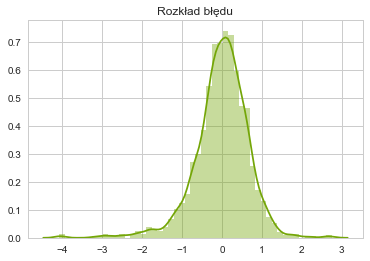

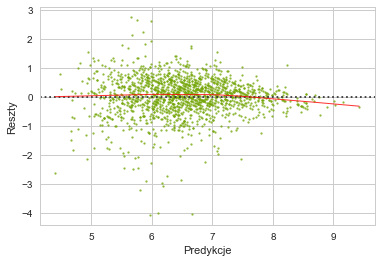

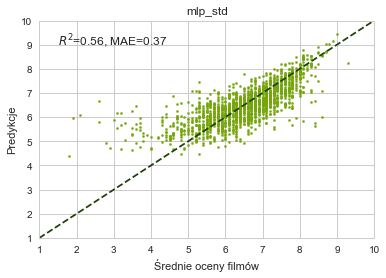

In [59]:
scores_std = {}
for name, model in models_std.items(): 
    pred = h.get_predictions(model, X_test_std)
    h.plot(y_test_std, pred, 'selected_features/std', name)
    scores_std[name] = h.scores(pred, y_test_std)

In [60]:
for name in scores_std.keys():
    print(name+ ": " + str(scores_std[name]['accuracy']))

svr_std: 91.66695022616447
nusvr_std: 91.76684644073991
decision_tree_std: 90.03486299209635
random_forest_std: 90.72661561016668
adaboost_std: 90.17321365545746
gradient_boosting_std: 91.99943020702877
knn_std: 90.19868189395979
linear_regression_std: 90.73955617887495
bayesian_ridge_std: 90.73374902538504
sgd_std: 90.6802061501206
mlp_std: 92.1263735856103


In [61]:
acc_std = {}
mae_std = {}
mse_std = {}
rmse_std = {}
r2_std = {}
for name, value in scores_std.items():
    acc_std[name] = value['accuracy']
    mae_std[name] = value['mae']
    mse_std[name] = value['mse']
    rmse_std[name] = value['rmse']
    r2_std[name] = value['r2']

In [62]:
x_bar = acc_std.keys()
y_bar = acc_std.values()
y_bar = [round(i, 2) for i in y_bar]

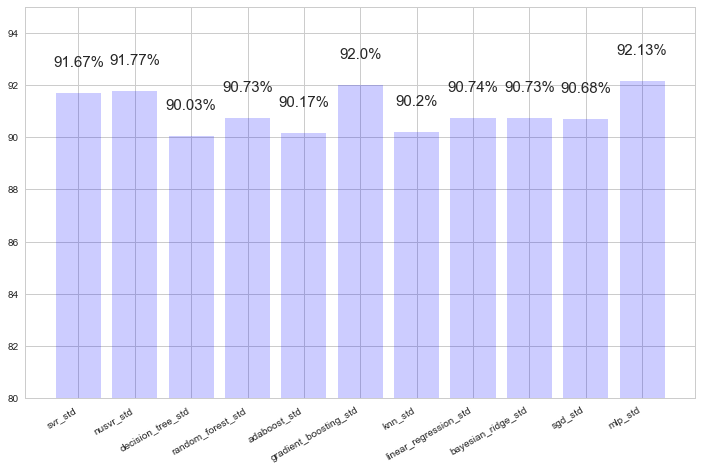

In [63]:
from matplotlib import cm
f, ax = plt.subplots(1,1, figsize=(12,8))
f.autofmt_xdate()
ax.set_ylim(80,95)
g = plt.bar(x_bar, y_bar, alpha=0.2, color=cm.bwr_r(y_bar))
h.autolabel(ax, g, 0, 15)   
plt.savefig('images/selected_features/models_accuracy_std.jpg', dpi = 300)

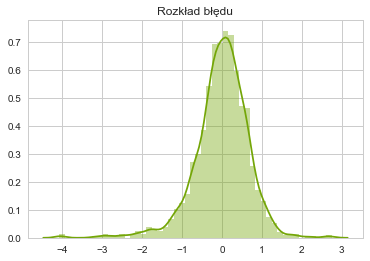

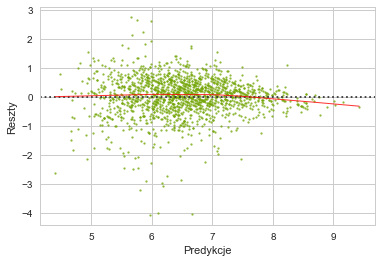

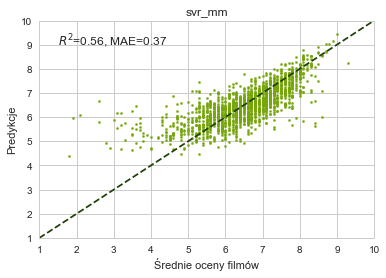

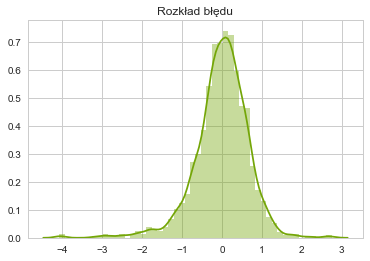

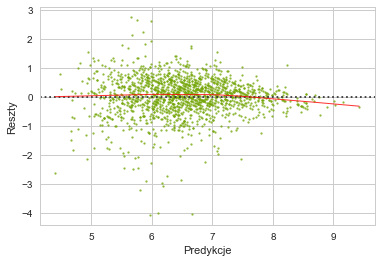

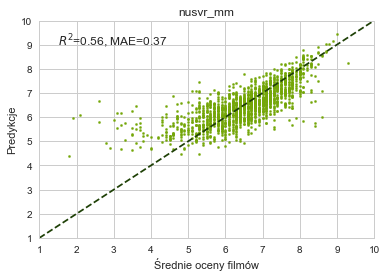

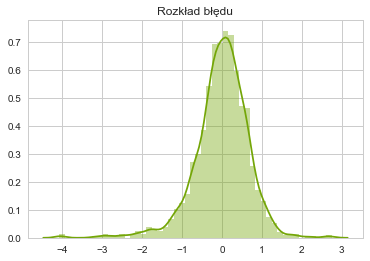

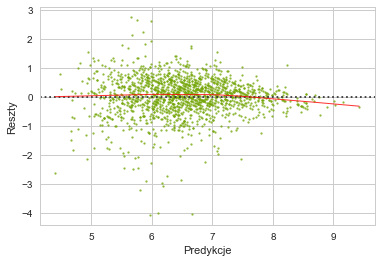

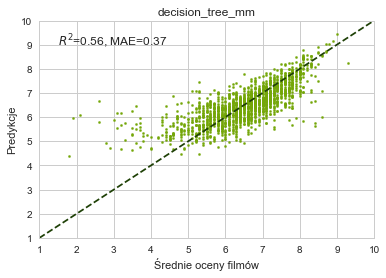

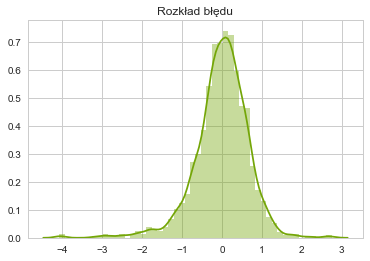

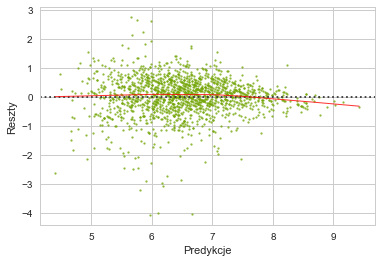

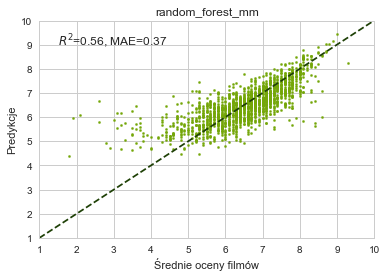

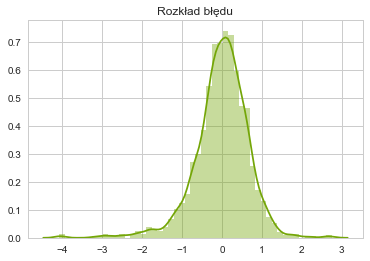

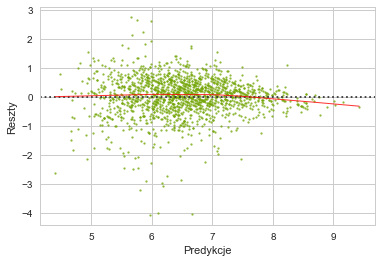

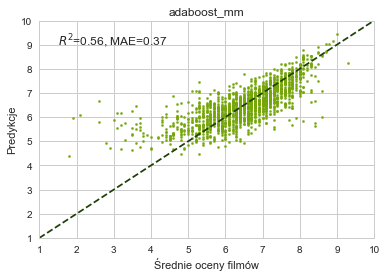

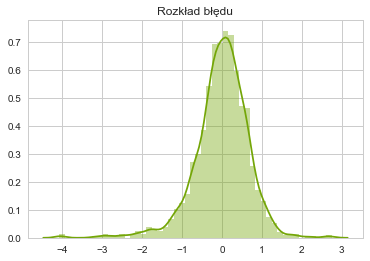

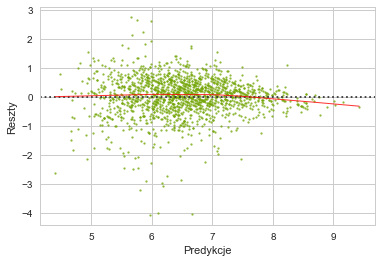

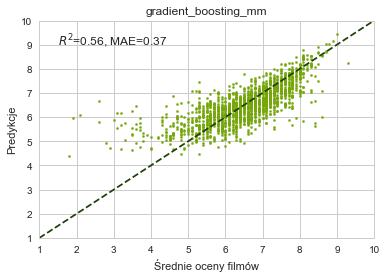

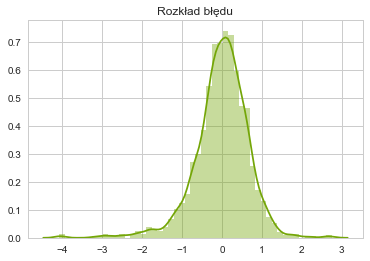

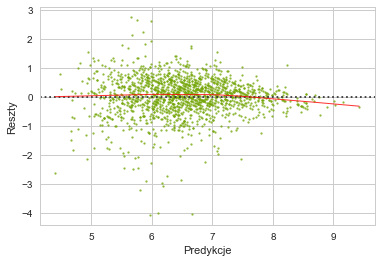

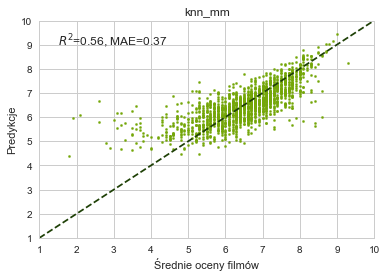

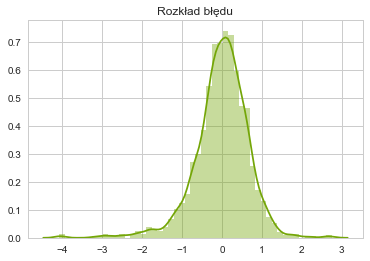

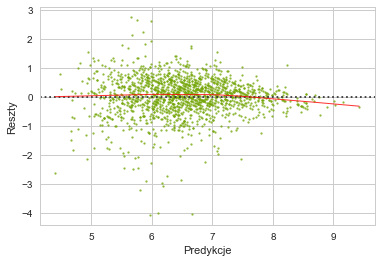

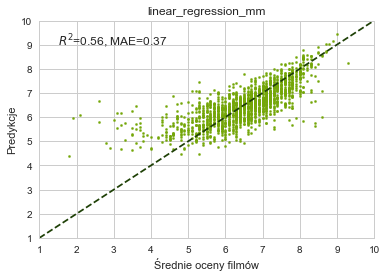

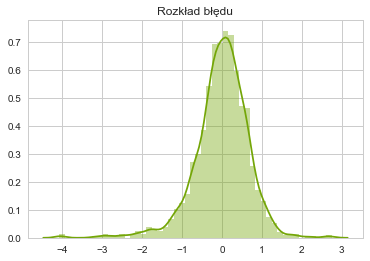

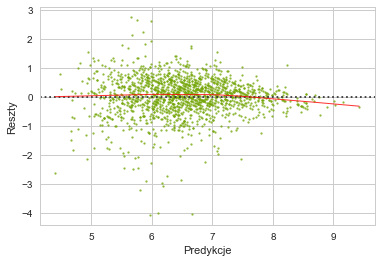

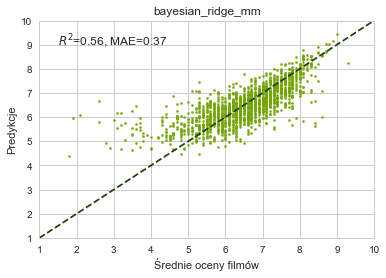

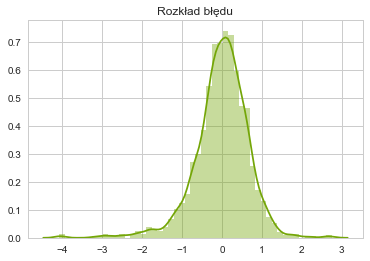

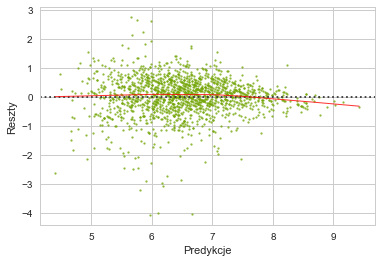

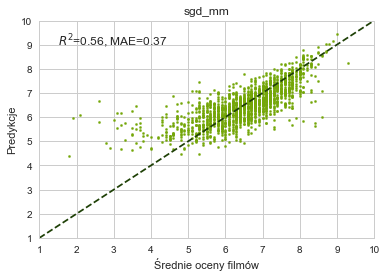

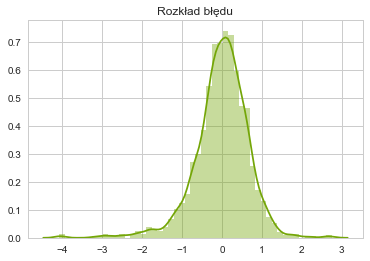

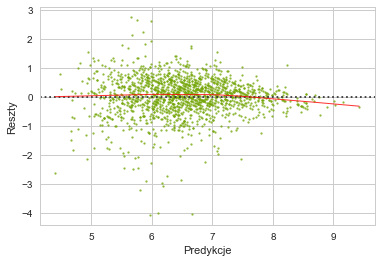

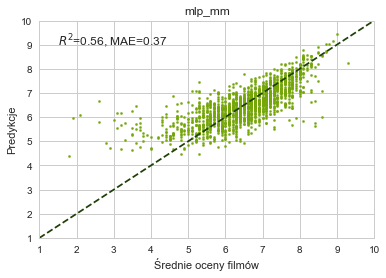

In [64]:
scores_mm = {}
preds_mm = []
for name, model in models_mm.items(): 
    preds_mm.append(h.get_predictions(model, X_test_mm))
    h.plot(y_test_mm, pred, 'selected_features/mm', name)
    scores_mm[name] = h.scores(pred, y_test_mm)

In [65]:

from sklearn.metrics import r2_score, median_absolute_error
def plot_true_vs_pred(y_test, predictions, model):
    plt.figure()
    plt.xlim(1,10)
    plt.ylim(1,10)
    plt.scatter(y_test, predictions, s=5,color="#74A608")
    plt.plot([1, 10], [1, 10], '--k', color = "#1E4006")
    plt.text(1.5, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, predictions), median_absolute_error(y_test, predictions)))
    plt.xlabel('Średnia ocena filmu')
    plt.ylabel('Predykcja')
    plt.title(model)
    plt.savefig('images/to_show/'+model+'_mm.jpg', dpi = 300)

In [66]:
def plot_residuals_vs_fitted(y_test, predictions):
    plt.figure()
    plt.scatter(predictions, (y_test - predictions), s=2.5,color="#74A608")
    plt.xlabel('Predykcja')
    plt.ylabel('Błąd')
    plt.title('Residuals vs fitted')
    

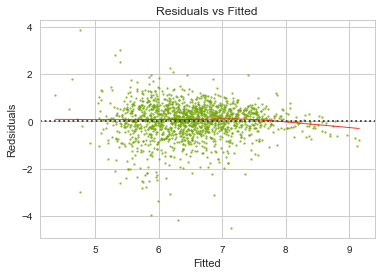

In [67]:
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(preds_mm[0], y_test,
                          lowess=True,
                          scatter_kws={'s':5, 'alpha': 0.8, 'color': "#74A608" },
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted')
plot_lm_1.axes[0].set_ylabel('Redsiduals');
plt.savefig('images/to_show/residuals_vs_fitted_svr_mm.jpg', dpi = 300)

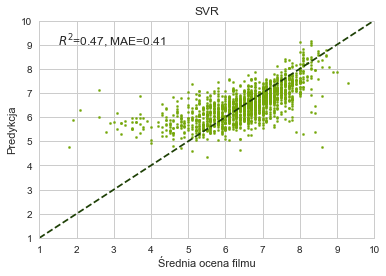

In [68]:
plot_true_vs_pred(y_test, preds_mm[0], "SVR")

In [69]:
def error_dist_plot(y_test, predictions, model):
    fig = plt.figure()
    sns.distplot((y_test - predictions),bins=50, color="#74A608")
    plt.xlabel('')
    plt.title('Rozkład błędu')
    plt.savefig('images/to_show/error_distribution' + model +'_mm.jpg', dpi = 300)

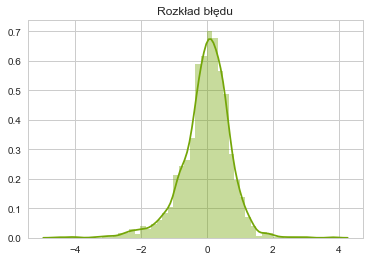

In [70]:
error_dist_plot(y_test, preds_mm[0], "SVR")

In [71]:
models_mm['gradient_boosting_mm'].score(X_test_mm, y_test_mm)

0.5608586949932852

In [72]:
for name in scores_mm.keys():
    print(name+ ": " + str(scores_mm[name]['r2']))

svr_mm: 0.2550975024703144
nusvr_mm: 0.2550975024703144
decision_tree_mm: 0.2550975024703144
random_forest_mm: 0.2550975024703144
adaboost_mm: 0.2550975024703144
gradient_boosting_mm: 0.2550975024703144
knn_mm: 0.2550975024703144
linear_regression_mm: 0.2550975024703144
bayesian_ridge_mm: 0.2550975024703144
sgd_mm: 0.2550975024703144
mlp_mm: 0.2550975024703144


In [73]:
print("R2 SCORE")
for name in scores_mm.keys():
    print(name)
    print("Score: {} ".format(models_mm[name].score(X_test_mm, y_test_mm) * 100))
    print("Metrics: {}".format(scores_mm[name]['r2']  * 100))

R2 SCORE
svr_mm
Score: 46.57675269049983 
Metrics: 25.509750247031437
nusvr_mm
Score: 46.16222079251225 
Metrics: 25.509750247031437
decision_tree_mm
Score: 34.27531153440657 
Metrics: 25.509750247031437
random_forest_mm
Score: 40.71705062402927 
Metrics: 25.509750247031437
adaboost_mm
Score: 39.71082713417939 
Metrics: 25.509750247031437
gradient_boosting_mm
Score: 56.085869499328524 
Metrics: 25.509750247031437
knn_mm
Score: 32.624750121981116 
Metrics: 25.509750247031437
linear_regression_mm
Score: 38.44183242594089 
Metrics: 25.509750247031437
bayesian_ridge_mm
Score: 38.64623071200863 
Metrics: 25.509750247031437
sgd_mm
Score: 38.98064169908103 
Metrics: 25.509750247031437
mlp_mm
Score: 55.03515602532922 
Metrics: 25.509750247031437


In [74]:
print("MAE SCORE")
for name in scores_mm.keys():
    print(name)
    print("100 - acc: {} ".format(100- scores_mm[name]['accuracy'] ))
    print("mae: {}".format(scores_mm[name]['mse'] ))

MAE SCORE
svr_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
nusvr_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
decision_tree_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
random_forest_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
adaboost_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
gradient_boosting_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
knn_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
linear_regression_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
bayesian_ridge_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
sgd_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623
mlp_mm
100 - acc: 7.873626414389705 
mae: 0.4621734723485623


In [75]:
acc_mm = {}
mae_mm = {}
mse_mm = {}
rmse_mm = {}
r2_mm = {}
for name, value in scores_mm.items():
    acc_mm[name] = value['accuracy']
    mae_mm[name] = value['mae']
    mse_mm[name] = value['mse']
    rmse_mm[name] = value['rmse']
    r2_mm[name] = value['r2']

In [76]:
x_bar = acc_mm.keys()
y_bar = acc_mm.values()
y_bar = [round(i, 2) for i in y_bar]

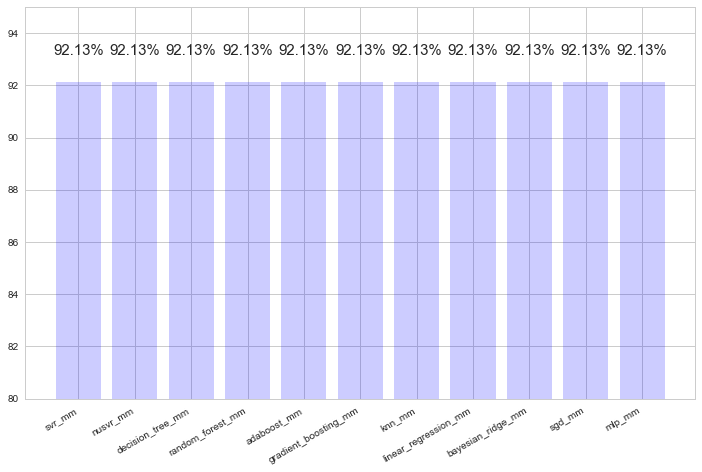

In [77]:
from matplotlib import cm
f, ax = plt.subplots(1,1, figsize=(12,8))
f.autofmt_xdate()
ax.set_ylim(80,95)
g = plt.bar(x_bar, y_bar, alpha=0.2, color=cm.bwr_r(y_bar))
h.autolabel(ax, g, 0, 15)   
plt.savefig('images/selected_features/models_accuracy_mm.jpg', dpi = 300)

In [78]:
x_bar = ['SVR', 'NuSVR', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'KNN', 'Linear Regression', 'Bayesian Ridge', 'Stochastic Gradient Descent', 'Multi-layer Perceptron']

ind = np.arange(len(x_bar)) 

y_bar = acc.values()
y_bar_std = acc_std.values()
y_bar_mm = acc_mm.values()

y_bar = [round(i, 2) for i in y_bar]
y_bar_std = [round(i, 2) for i in y_bar_std]
y_bar_mm = [round(i, 2) for i in y_bar_mm]

In [79]:
plt.set_cmap(cmap=cm.Set2)

<Figure size 432x288 with 0 Axes>

In [80]:
font = {'family' : 'normal',
                'size'   : 44}

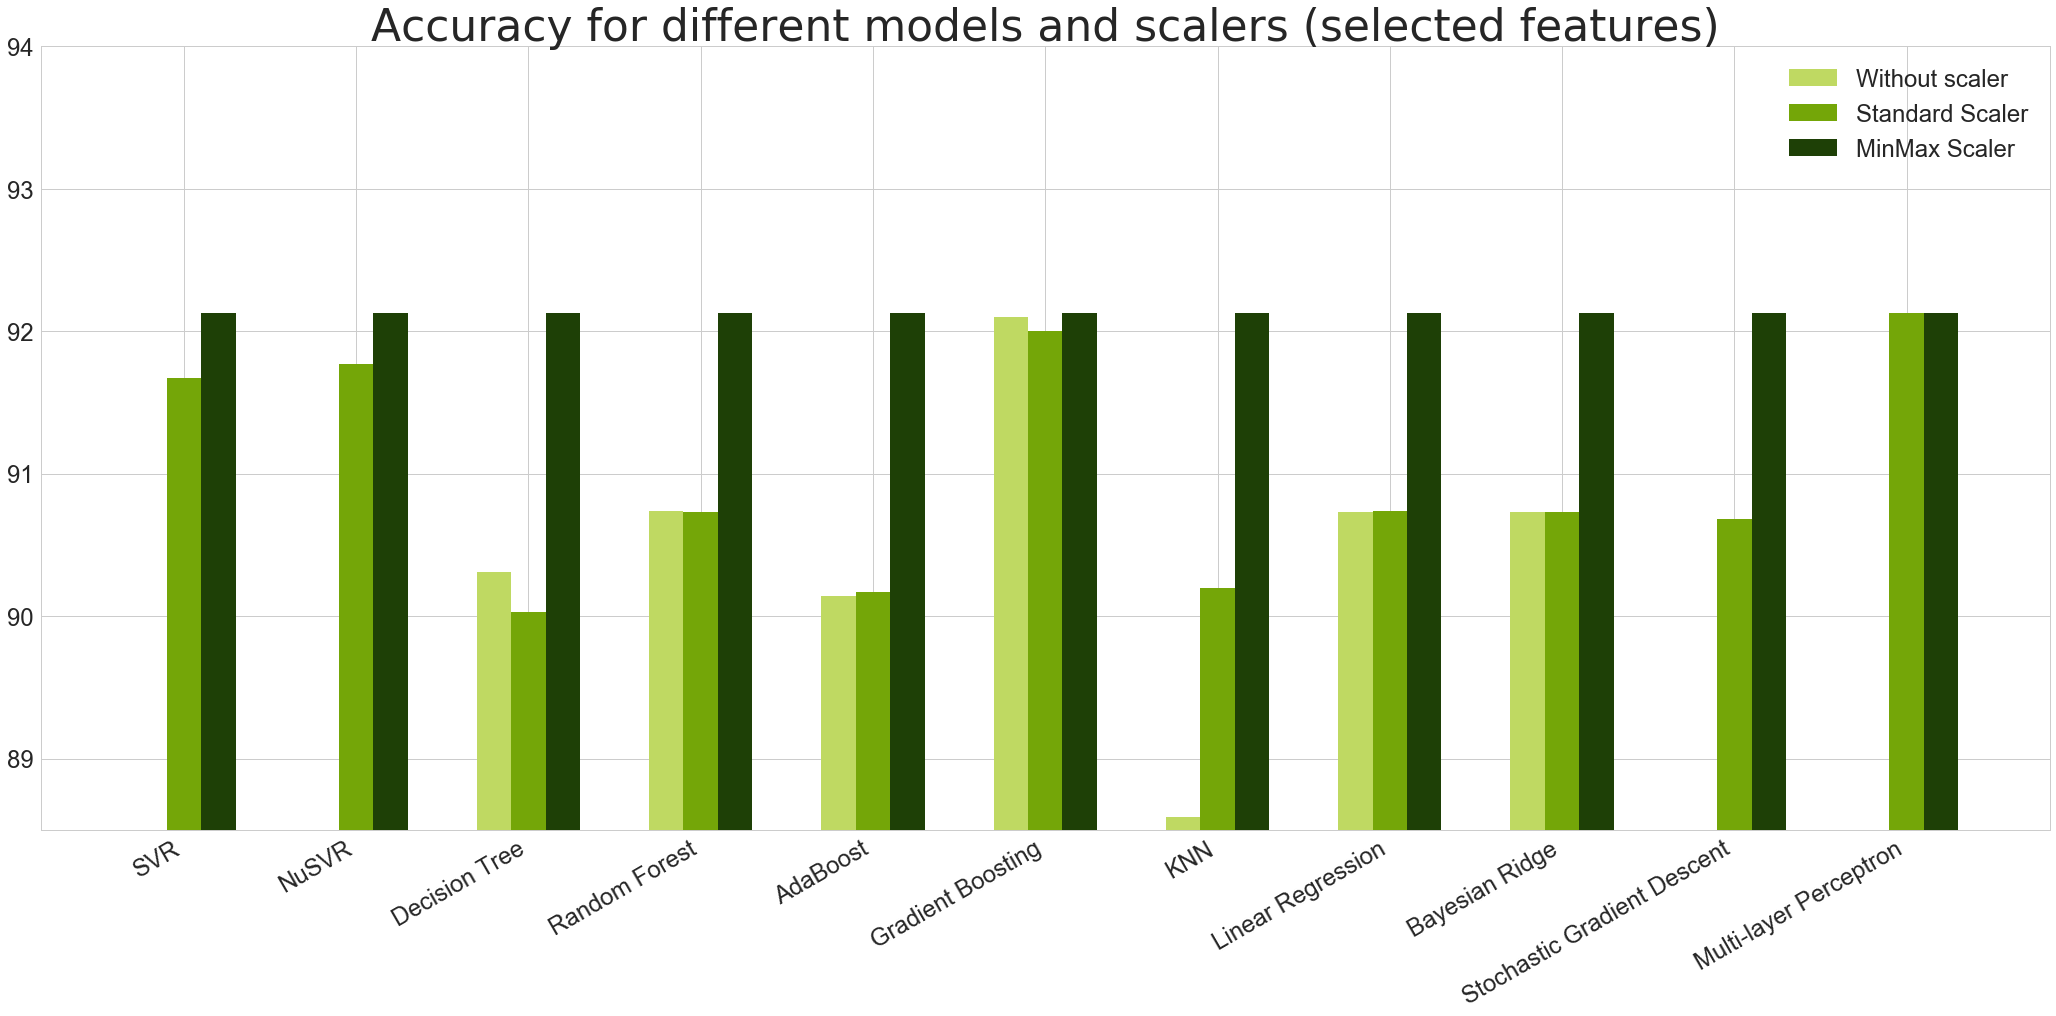

In [81]:

f, ax = plt.subplots(1,1, figsize=(36,16))


f.autofmt_xdate()
ax.set_ylim(88.5, 94)

g = plt.bar(ind - 0.3, y_bar, alpha=1, align='edge', width=0.2, color='#BFD962', label='Without scaler')
gg = plt.bar(ind, y_bar_std, alpha=1, align='center', width=0.2, color='#74A608', label='Standard Scaler')
ggg = plt.bar(ind + 0.3, y_bar_mm, alpha=1,  align='edge', width=-0.2, color='#1E4006', label='MinMax Scaler')


ax.set_title('Accuracy for different models and scalers (selected features)', fontdict=font)
ax.set_xticklabels(x_bar)
ax.set_xticks(ind, minor=False)

ax.legend(prop={'size': 24, 'style': 'normal'})

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(24) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(24) 

#h.autolabel(ax, g, 60, 10, )   
#h.autolabel(ax, gg, 60,10)   
#h.autolabel(ax, ggg, 60, 10, )   
plt.savefig('images/selected_features/models_accuracy_selected.jpg')